In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import logging
logging.basicConfig(level=logging.WARN)

import numpy as np
import matplotlib.pyplot as plt

In [3]:
import qcsapphire
import qt3rfsynthcontrol
import qt3utils.experiments.cwodmr
import qt3utils.nidaq

In [4]:
pulser = qcsapphire.Pulser('COM10')
rfsynth = qt3rfsynthcontrol.QT3SynthHD('COM5')

In [5]:
nidaq_config = qt3utils.nidaq.EdgeCounter('Dev1')

In [6]:
def plot_trace(trace, N_cycles=1, clock_rate=1):
    plt.plot(np.arange(len(trace)) / clock_rate, trace/N_cycles * clock_rate)

In [7]:
cwodmr = qt3utils.experiments.cwodmr.CWODMR(pulser, rfsynth, nidaq_config,
                                           freq_high=2600e6,
                                           freq_low=2550e6,
                                           freq_step=1e6,
                                           rf_power=0)

In [8]:
cwodmr.experimental_conditions()

{'freq_low': 2550000000.0,
 'freq_high': 2600000000.0,
 'freq_step': 1000000.0,
 'rf_power': 0,
 'rf_width': 5e-06,
 'clock_period': 2e-07}

In [9]:
#cwodmr.freq_step = .5e6
logging.basicConfig(level=logging.INFO)


In [10]:
scan_data = cwodmr.run(N_cycles=100000)

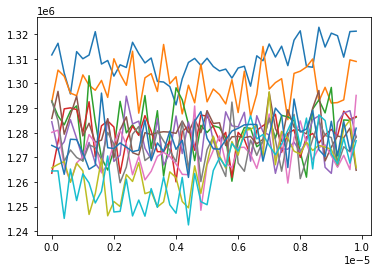

In [11]:
def plot_trace(trace, N_cycles=1, clock_rate=1):
    plt.plot(np.arange(len(trace)) / clock_rate, trace/N_cycles * clock_rate)
    
for scan in scan_data[::5]:
    plot_trace(scan[-1], cwodmr.N_cycles, clock_rate = 1./cwodmr.clock_period)

In [12]:
two_d_scan_data = np.array([scan[-1] for scan in scan_data])
signal = two_d_scan_data[:,:two_d_scan_data.shape[1]//4].mean(axis=1)
background = two_d_scan_data[:,two_d_scan_data.shape[1]//2:].mean(axis=1)

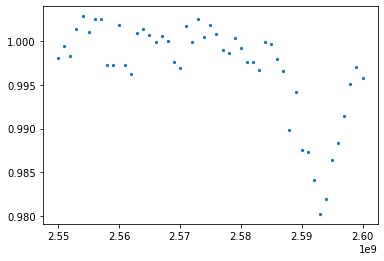

In [13]:
plt.scatter(np.array([scan[0] for scan in scan_data]), signal/background, s=5)

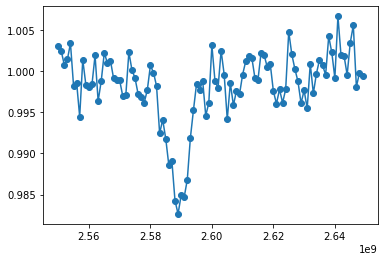

In [20]:
start = 50
stop = 150

plt.plot(np.array([scan[0] for scan in scan_data[start:stop]]), signal[start:stop]/background[start:stop], 'o-')

In [15]:
start = 20
stop = -1
list(zip(np.array([scan[0] for scan in scan_data[start:stop]]), signal[start:stop]/background[start:stop]))

[(2570000000.0, 0.9969879675101921),
 (2571000000.0, 1.001722732225872),
 (2572000000.0, 0.9999669757113537),
 (2573000000.0, 1.0025499732402197),
 (2574000000.0, 1.0005276909118686),
 (2575000000.0, 1.0018264893664093),
 (2576000000.0, 1.000771358655176),
 (2577000000.0, 0.9989707927969685),
 (2578000000.0, 0.9986163060003843),
 (2579000000.0, 1.0004198864058247),
 (2580000000.0, 0.9992659597471593),
 (2581000000.0, 0.9976637001686791),
 (2582000000.0, 0.9975630330374646),
 (2583000000.0, 0.9967324627585109),
 (2584000000.0, 0.9999096577092351),
 (2585000000.0, 0.9997221350489043),
 (2586000000.0, 0.9979320274600403),
 (2587000000.0, 0.9966027974358573),
 (2588000000.0, 0.9897846285605302),
 (2589000000.0, 0.9941789837844143),
 (2590000000.0, 0.9875433561516727),
 (2591000000.0, 0.9873672350228246),
 (2592000000.0, 0.9840621420502053),
 (2593000000.0, 0.9802187152193742),
 (2594000000.0, 0.9819671808594365),
 (2595000000.0, 0.9863521740244567),
 (2596000000.0, 0.9883080163636231),
 (2